In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import ARMA
import numpy as np
from IPython.display import Image

In [2]:
df = pd.read_excel('merge2.xlsx')
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Date', drop=True, inplace=True)
df.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,,,,,,
2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519,1,1,0,0,0,0
2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484,0,1,0,0,0,0
2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313,1,3,0,0,0,0
2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618,0,3,0,0,0,0
2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12,1442.000000,1468.750000,1413.000000,1430.250000,1430.250000,90183,44585,8728547,49354,8113735,544,128117
2020-11-13,1427.000000,1435.000000,1410.000000,1428.349976,1428.349976,47680,44620,8773167,47620,8161355,517,128634
2020-11-17,1450.000000,1454.349976,1432.500000,1444.050049,1444.050049,37928,38548,8912697,44753,8332928,472,130441


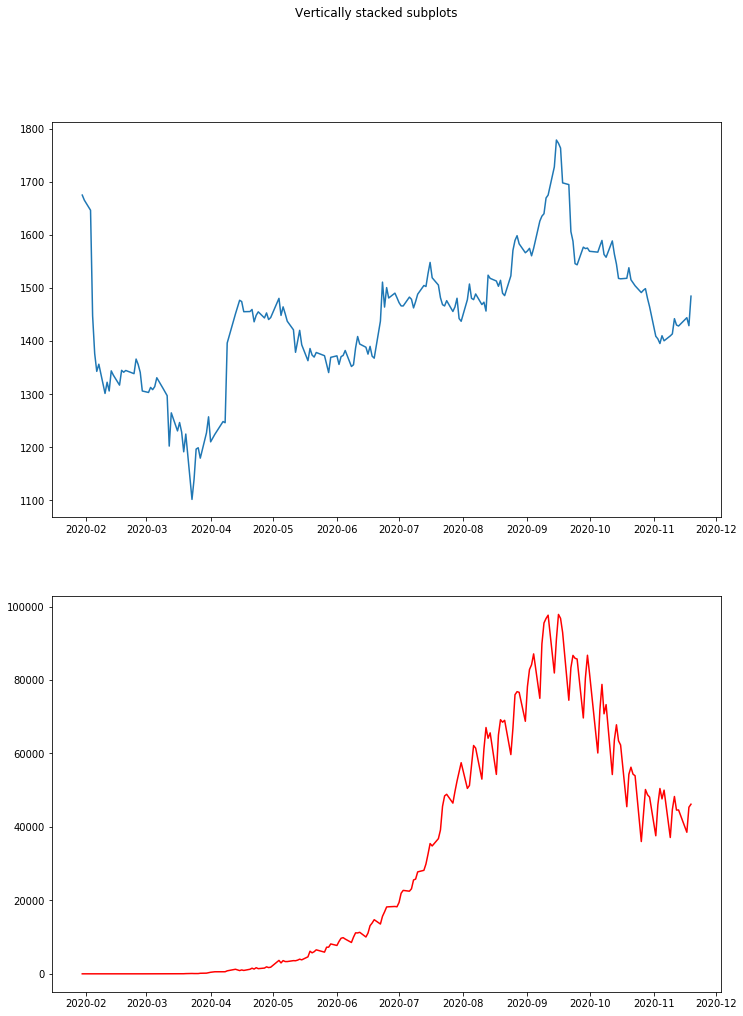

In [40]:
rcParams['figure.figsize'] = 12, 16
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(df['Close'])
ax2.plot(df['Daily Confirmed'], color='red')


In [29]:
k = df['Close'].to_numpy()
norm = np.linalg.norm(k)
k = k/norm
p = df['Daily Confirmed'].to_numpy()
norm = np.linalg.norm(p)
p = p/norm

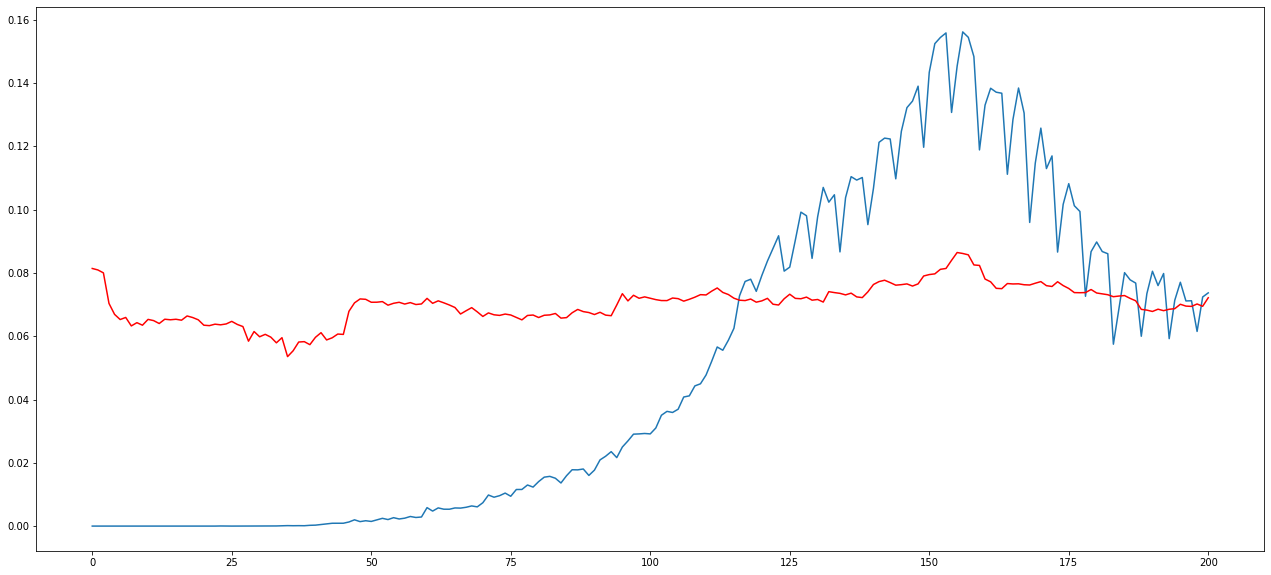

In [30]:
rcParams['figure.figsize'] = 22, 10
fig = plt.plot()
plt.plot(p)
plt.plot(k, color='red')

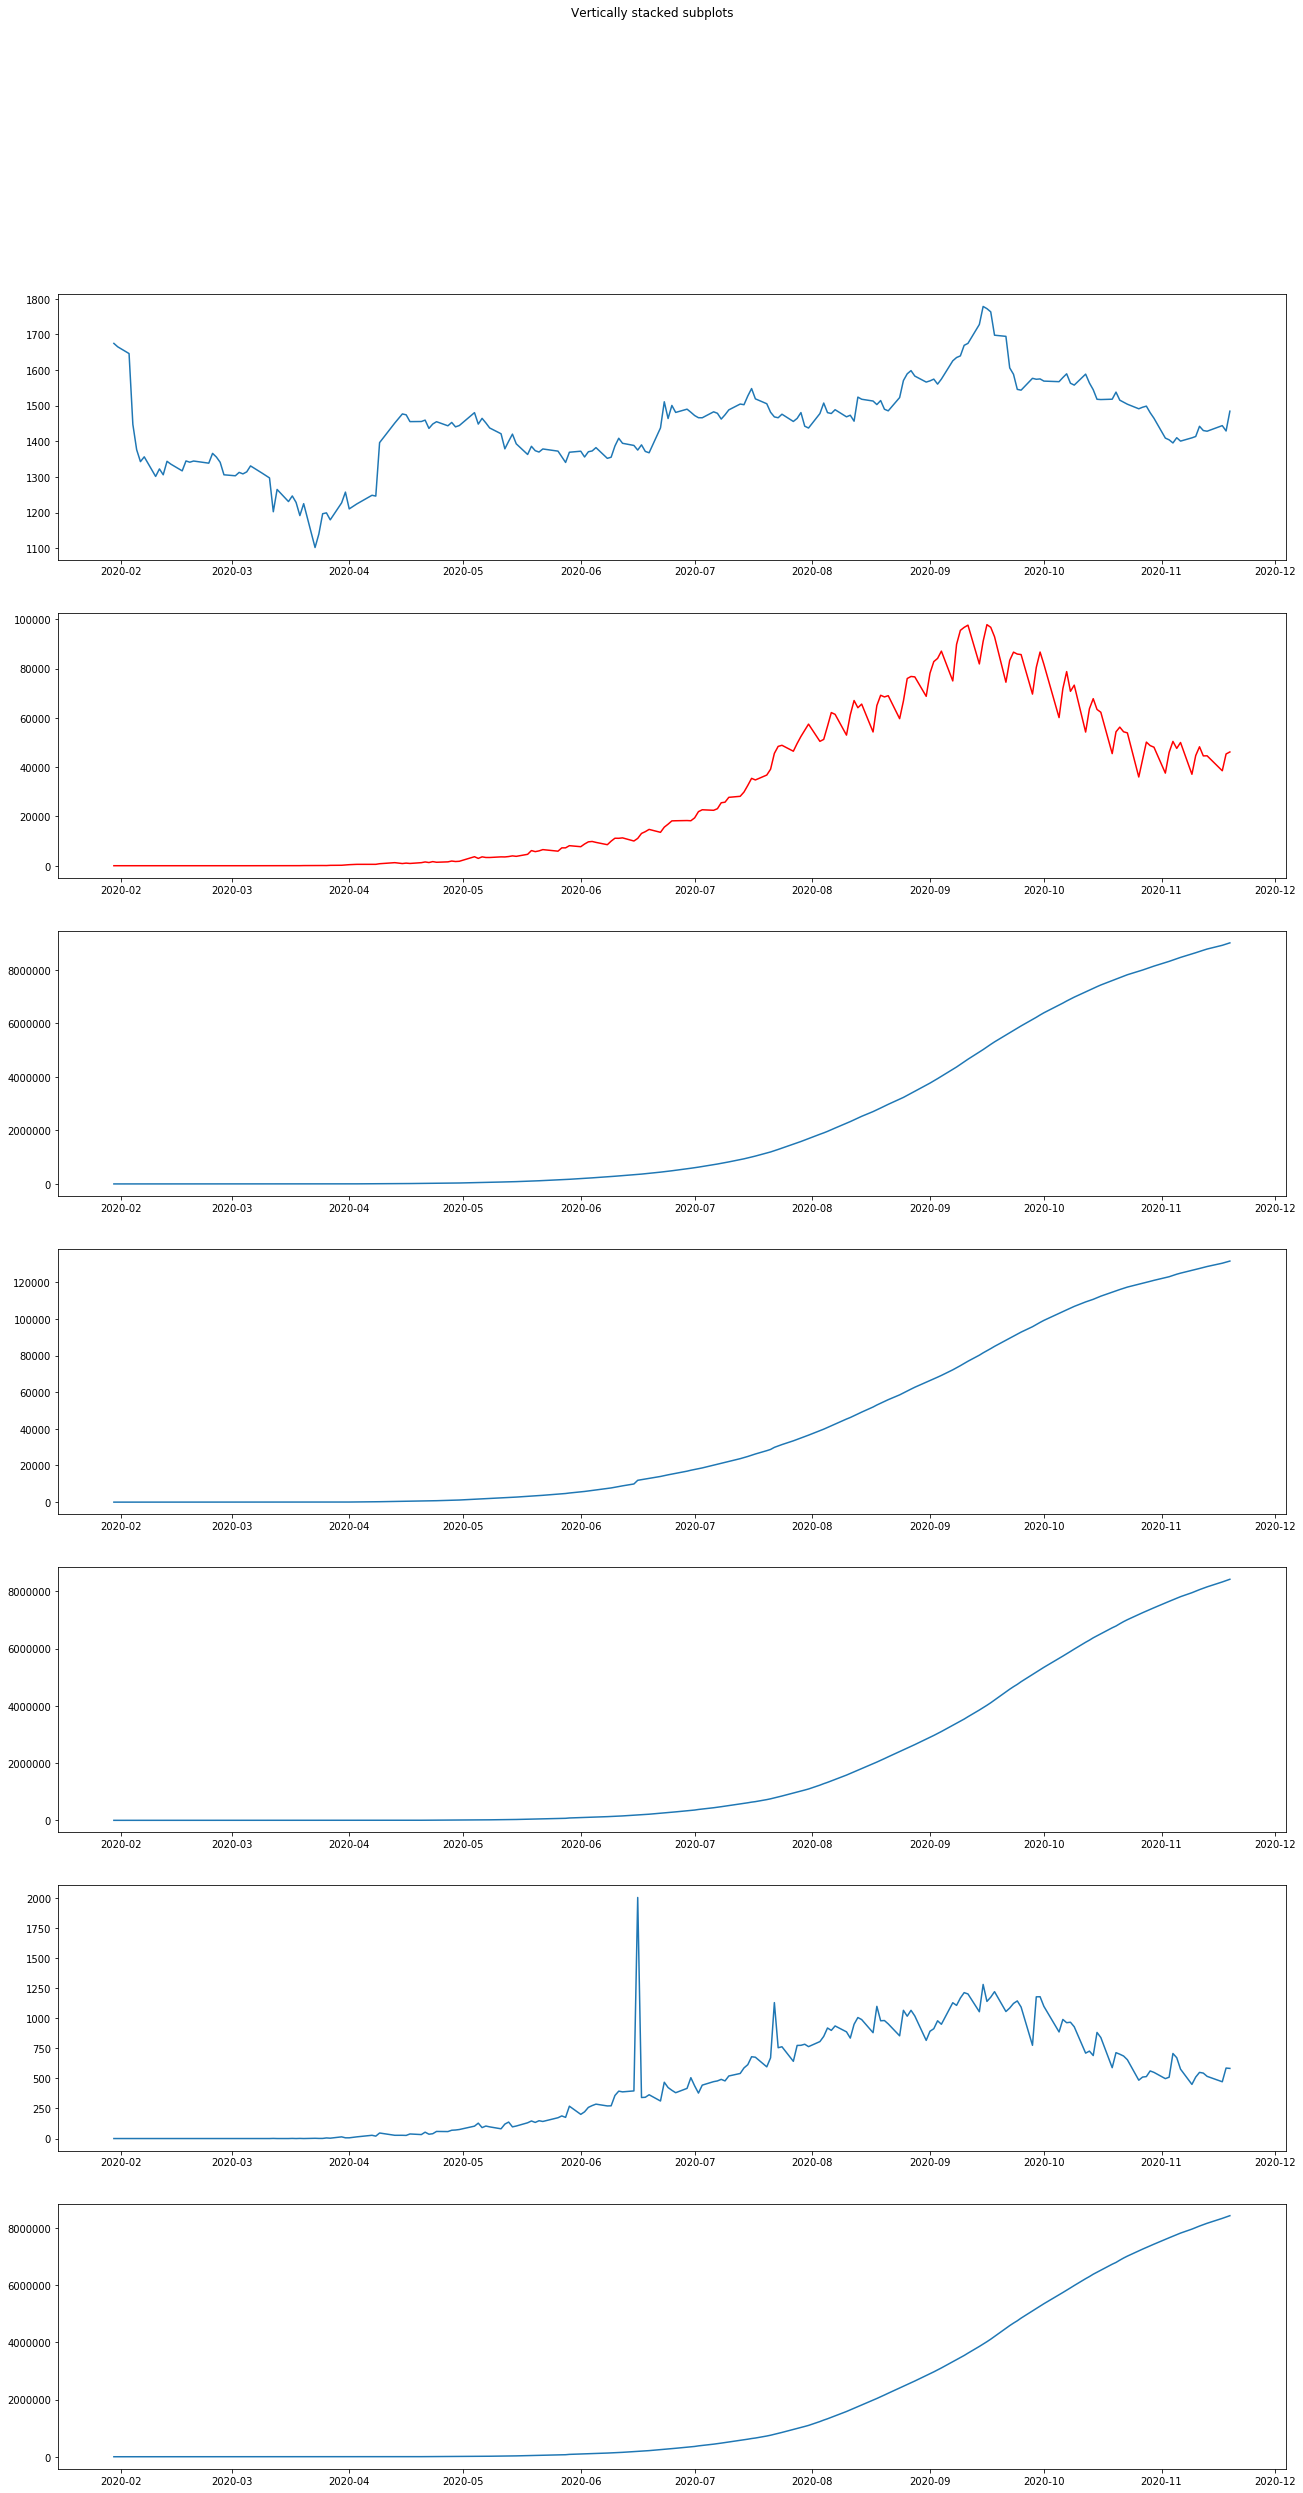

In [35]:
rcParams['figure.figsize'] = 22, 40
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7)
fig.suptitle('Vertically stacked subplots')
ax1.plot(df['Close'])
ax2.plot(df['Daily Confirmed'], color='red')
ax3.plot(df['Total Confirmed'])
ax4.plot(df['Total Deceased'])
ax5.plot(df['Total Recovered'])
ax6.plot(df['Daily Deceased'])
ax7.plot(df['Total Recovered'])

After month 6(July) trend for NSE Closing Price looked similar to Daily Deceased adn Daily Confirmed

In [36]:
df19 = pd.read_csv('GLAXO19.NS.csv')

In [38]:
df19.Date = pd.to_datetime(df19.Date)

In [39]:
df19.set_index(df19.Date, inplace=True)
df19.drop(axis=1, columns=['Date'], inplace=True)
df19

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-30,1417.400024,1444.000000,1400.349976,1426.599976,1359.731934,10102.0
2019-01-31,1418.750000,1425.000000,1389.949951,1409.250000,1343.195068,24542.0
2019-02-01,1404.500000,1415.000000,1396.300049,1407.550049,1341.574829,10985.0
2019-02-04,1420.000000,1420.349976,1356.599976,1404.099976,1338.286499,61773.0
2019-02-05,1405.050049,1409.300049,1384.900024,1396.099976,1330.661377,12480.0
...,...,...,...,...,...,...
2019-11-13,1621.000000,1634.949951,1591.199951,1604.800049,1584.067505,40954.0
2019-11-14,1607.000000,1615.000000,1590.000000,1601.250000,1580.563354,39755.0
2019-11-15,1600.000000,1610.000000,1595.199951,1606.199951,1585.449341,44288.0


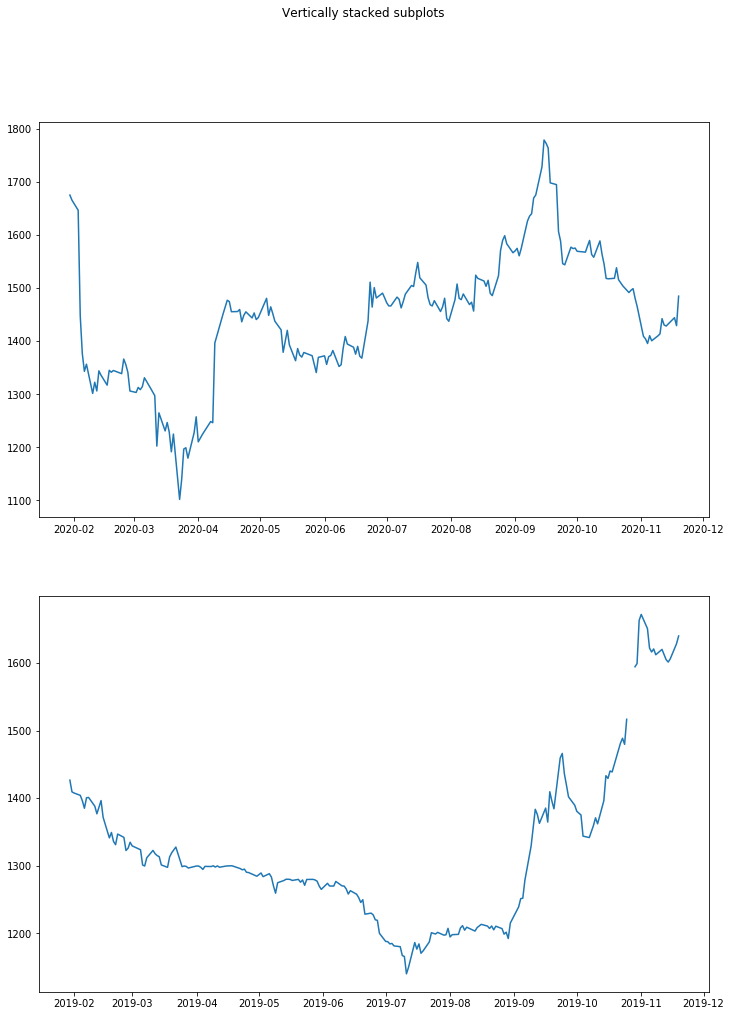

In [41]:
rcParams['figure.figsize'] = 12, 16
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(df['Close'])
ax2.plot(df19['Close'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4f0697308>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4f068fb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4f06a17c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4f067c708>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4f066e408>],
 'means': []}

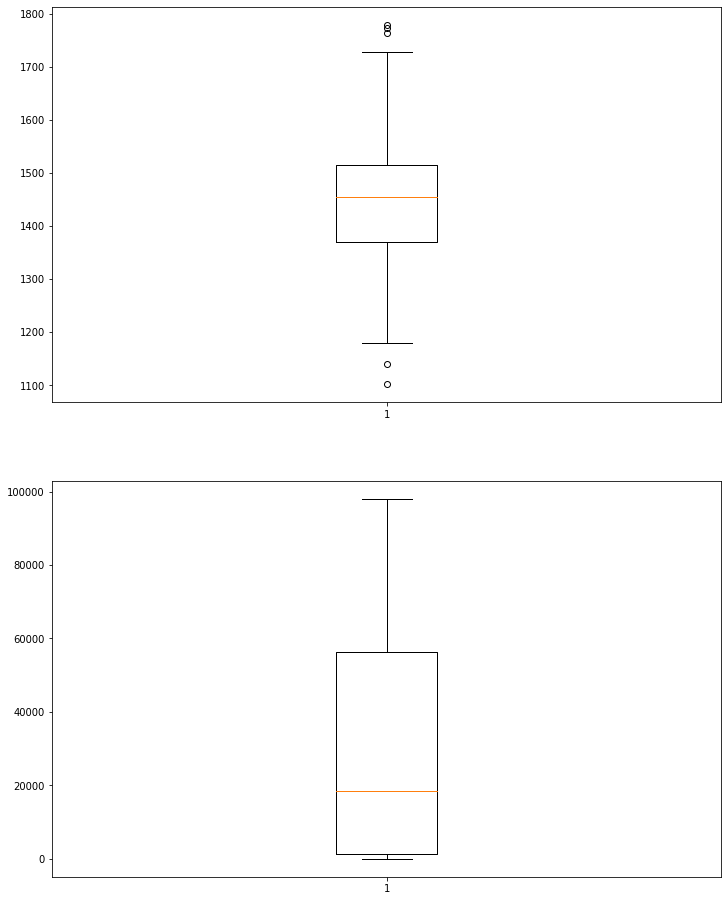

In [45]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(df['Close'])
ax2.boxplot(df['Daily Confirmed'])

# Stationarity Test

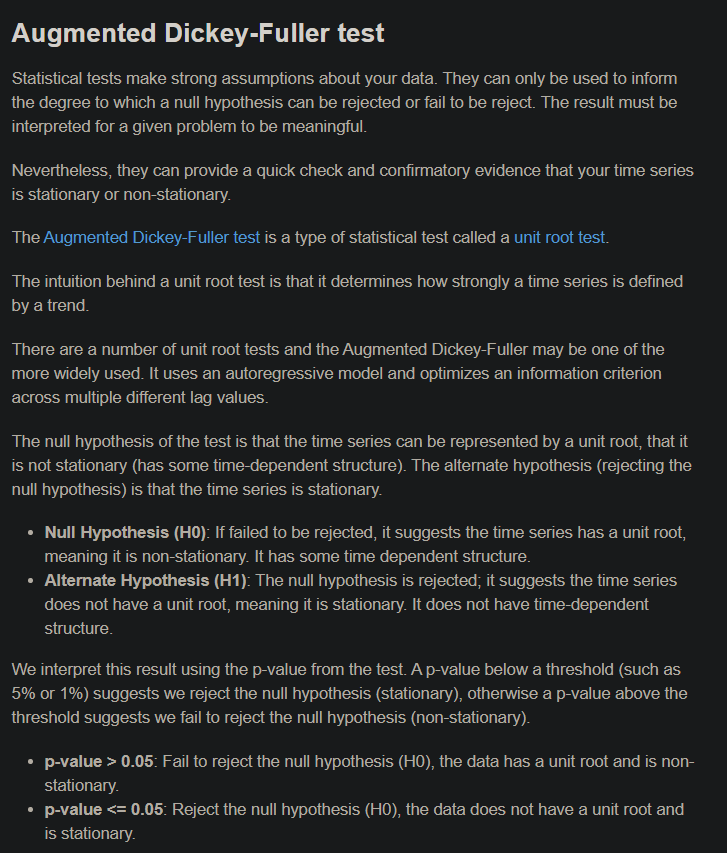

In [52]:
from IPython.display import Image
Image(filename='ADF.png')

In [57]:

X = df["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -2.389740
p-value: 0.144653
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
Failed to Reject Ho - Time Series is Non-Stationary


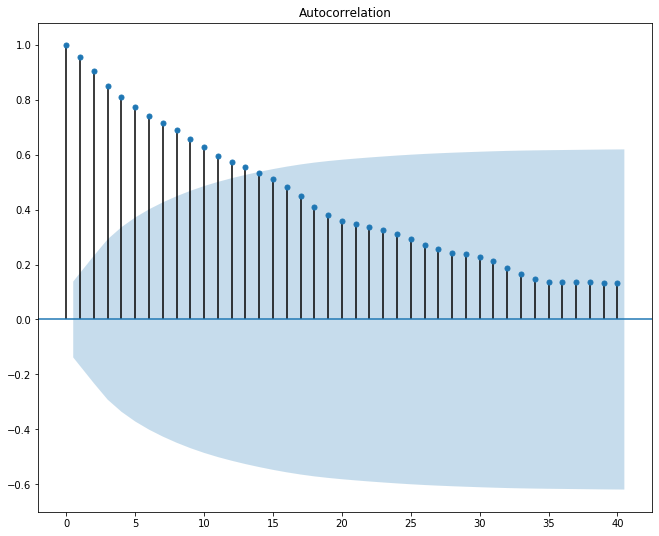

In [77]:
rcParams['figure.figsize'] = 11,9
k = tsaplots.plot_acf(df['Close'], lags=40)

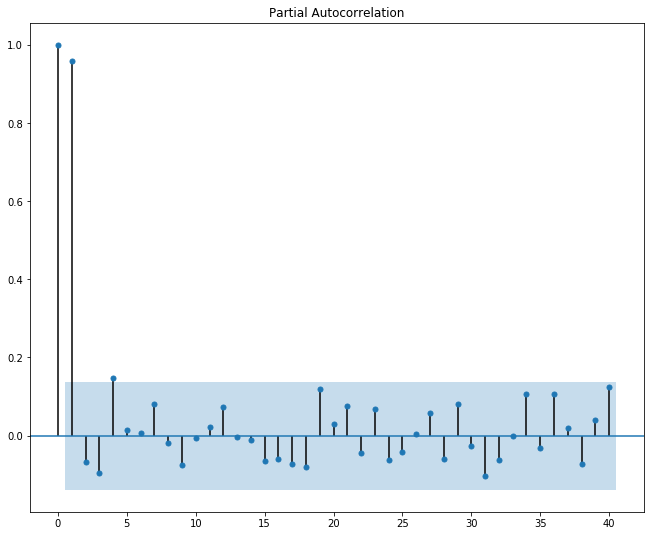

In [79]:
rcParams['figure.figsize'] = 11,9
k = tsaplots.plot_pacf(df['Close'], lags=40)

In [136]:
import pmdarima as pm

In [85]:
train = df['Close'][:191]
test = df['Close'][191:]

In [87]:
results = pm.auto_arima(train)
print(results.summary())

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  191
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -929.529
Date:                Thu, 26 Nov 2020   AIC                           1871.058
Time:                        11:49:59   BIC                           1890.540
Sample:                             0   HQIC                          1878.949
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0806      2.214     -0.488      0.626      -5.420       3.259
ar.L1          1.1161      0.059     18.877      0.000       1.000       1.232
ar.L2         -0.8694      0.064    -13.628      0.0

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


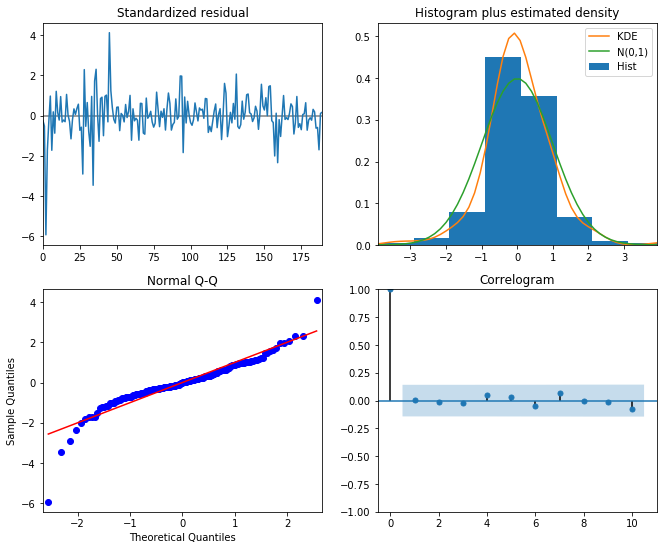

In [88]:
results.plot_diagnostics()
plt.show()

In [89]:
prediction = pd.DataFrame(results.predict(n_periods=10), index=test.index)
prediction.columns = ['Close']
prediction

,Close
Date,
2020-11-05,1386.467308
2020-11-06,1388.002489
2020-11-09,1396.401823
2020-11-10,1403.361224
2020-11-11,1402.745466
2020-11-12,1394.926754
2020-11-13,1385.654756
2020-11-17,1381.023262
2020-11-18,1382.834746


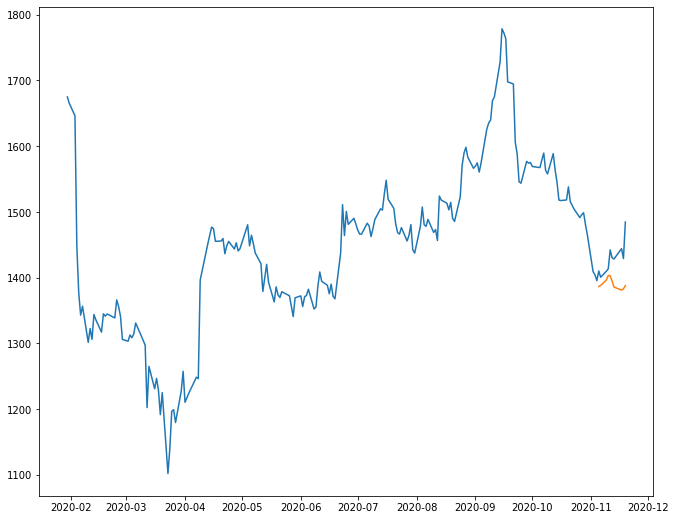

In [91]:
plt.plot(df['Close'], label='Original')
plt.plot(prediction, label='Predicted Values')
plt.show()

In [119]:
from sklearn.metrics import r2_score
test['predicted_close'] = prediction
r2_score(df['Close'][191:].to_numpy(), prediction['Close'].to_numpy())

-3.003979090855654

In [124]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df['Close'][191:].to_numpy(), prediction['Close'].to_numpy(), squared=False)

In [125]:
rms

45.93310342136419

In [127]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [135]:
results = pm.auto_arima(train, exogenous=df['Daily Confirmed'])
print(results.summary())

ValueError: Expected 2D array, got 1D array instead:
array=[    1     0     1     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     2     1    22
     2     1     9     8    10    10    14    20    25    27    58    94
    74    86    73   153   187   309   424   560   573   565   813  1243
   886  1061   922  1239  1537  1292  1667  1408  1568  1902  1705  1801
  3656  2971  3602  3344  3339  3592  3562  3726  3991  3808  4628  6154
  5720  6023  6536  5907  7246  7254  8138  7723  8812  9689  9847  9472
  8536  9981 11156 11135 11306 10032 11086 13108 13829 14740 13560 15656
 16868 18205 18255 18339 18256 19429 21947 22718 22500 23147 25561 25790
 27762 28178 29917 32607 35468 34820 36806 39170 45601 48443 48888 46484
 49631 52479 54968 57486 50488 51282 56626 62170 61455 53016 61252 67066
 64141 65610 54298 65024 69196 68518 69029 59696 66873 75995 76827 76657
 68766 78168 82860 84156 87115 75015 89855 95536 96762 97655 81913 91098
 97860 96787 92973 74493 83362 86703 85921 85717 69669 80500 86748 81784
 60130 71869 78809 70797 73305 54262 63717 67811 63441 62304 45506 54348
 56264 54371 53931 36019 43036 50188 48765 48117 37592 46027 50465 47628
 50017 37119 44724 48285 44585 44620 38548 45366 46185].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [134]:
df['Daily Confirmed', Da]

Date
2020-01-30        1
2020-01-31        0
2020-02-03        1
2020-02-04        0
2020-02-05        0
              ...  
2020-11-12    44585
2020-11-13    44620
2020-11-17    38548
2020-11-18    45366
2020-11-19    46185
Name: Daily Confirmed, Length: 201, dtype: int64